![](http://osloyi5le.bkt.clouddn.com/ML%E6%A1%88%E4%BE%8Bbanner.jpg)

# 使用房价预测经典案例练习回归树建模和随机森林建模流程
作者：寒小阳、助教：haoshuai714

## 案例背景

描述案例背景：

描述案例背景：

1.本案例的目的是让大家更加了解回归树建模；

2.本案例采用经典的房屋价格数据集来进行学习；

3.本案例将回归树训练的结果进行了可视化展示；

## 基础知识

简要描述涉及到的基础知识：

1.决策树基本原理；

2.回归树的基本原理；

3.回归树的可视化过程；

4.补充的知识点：tree.export_graphviz的参数意义参考链接：http://www.cnblogs.com/pinard/p/6056319.html

5.拓展知识：补充tree.DecisionTreeRegressor的 参数意义；


## 代码：构建回归树

In [2]:
# 加载相关的包
import pandas as pd
from sklearn import preprocessing
from sklearn import tree
from sklearn.datasets import load_boston

#加载数据集
boston_house = load_boston()

#调用数据集中的数据
boston_feature_name = boston_house.feature_names
boston_features = boston_house.data
boston_target = boston_house.target


In [3]:
#查看data的相关信息
boston_feature_name


array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'],
      dtype='<U7')

In [4]:
#数据集描述
print(boston_house.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [5]:
#显示数据集的前5行
boston_features[:5,:]


array([[  6.32000000e-03,   1.80000000e+01,   2.31000000e+00,
          0.00000000e+00,   5.38000000e-01,   6.57500000e+00,
          6.52000000e+01,   4.09000000e+00,   1.00000000e+00,
          2.96000000e+02,   1.53000000e+01,   3.96900000e+02,
          4.98000000e+00],
       [  2.73100000e-02,   0.00000000e+00,   7.07000000e+00,
          0.00000000e+00,   4.69000000e-01,   6.42100000e+00,
          7.89000000e+01,   4.96710000e+00,   2.00000000e+00,
          2.42000000e+02,   1.78000000e+01,   3.96900000e+02,
          9.14000000e+00],
       [  2.72900000e-02,   0.00000000e+00,   7.07000000e+00,
          0.00000000e+00,   4.69000000e-01,   7.18500000e+00,
          6.11000000e+01,   4.96710000e+00,   2.00000000e+00,
          2.42000000e+02,   1.78000000e+01,   3.92830000e+02,
          4.03000000e+00],
       [  3.23700000e-02,   0.00000000e+00,   2.18000000e+00,
          0.00000000e+00,   4.58000000e-01,   6.99800000e+00,
          4.58000000e+01,   6.06220000e+00,   3.000

In [6]:
#data的target
boston_target

array([ 24. ,  21.6,  34.7,  33.4,  36.2,  28.7,  22.9,  27.1,  16.5,
        18.9,  15. ,  18.9,  21.7,  20.4,  18.2,  19.9,  23.1,  17.5,
        20.2,  18.2,  13.6,  19.6,  15.2,  14.5,  15.6,  13.9,  16.6,
        14.8,  18.4,  21. ,  12.7,  14.5,  13.2,  13.1,  13.5,  18.9,
        20. ,  21. ,  24.7,  30.8,  34.9,  26.6,  25.3,  24.7,  21.2,
        19.3,  20. ,  16.6,  14.4,  19.4,  19.7,  20.5,  25. ,  23.4,
        18.9,  35.4,  24.7,  31.6,  23.3,  19.6,  18.7,  16. ,  22.2,
        25. ,  33. ,  23.5,  19.4,  22. ,  17.4,  20.9,  24.2,  21.7,
        22.8,  23.4,  24.1,  21.4,  20. ,  20.8,  21.2,  20.3,  28. ,
        23.9,  24.8,  22.9,  23.9,  26.6,  22.5,  22.2,  23.6,  28.7,
        22.6,  22. ,  22.9,  25. ,  20.6,  28.4,  21.4,  38.7,  43.8,
        33.2,  27.5,  26.5,  18.6,  19.3,  20.1,  19.5,  19.5,  20.4,
        19.8,  19.4,  21.7,  22.8,  18.8,  18.7,  18.5,  18.3,  21.2,
        19.2,  20.4,  19.3,  22. ,  20.3,  20.5,  17.3,  18.8,  21.4,
        15.7,  16.2,

### 构建模型:直接从sklearn中调用模型

In [7]:
#初始化回归树模型：树的深度为4
rgs = tree.DecisionTreeRegressor(max_depth=4)
#训练模型
rgs = rgs.fit(boston_features, boston_target)

In [8]:
rgs

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

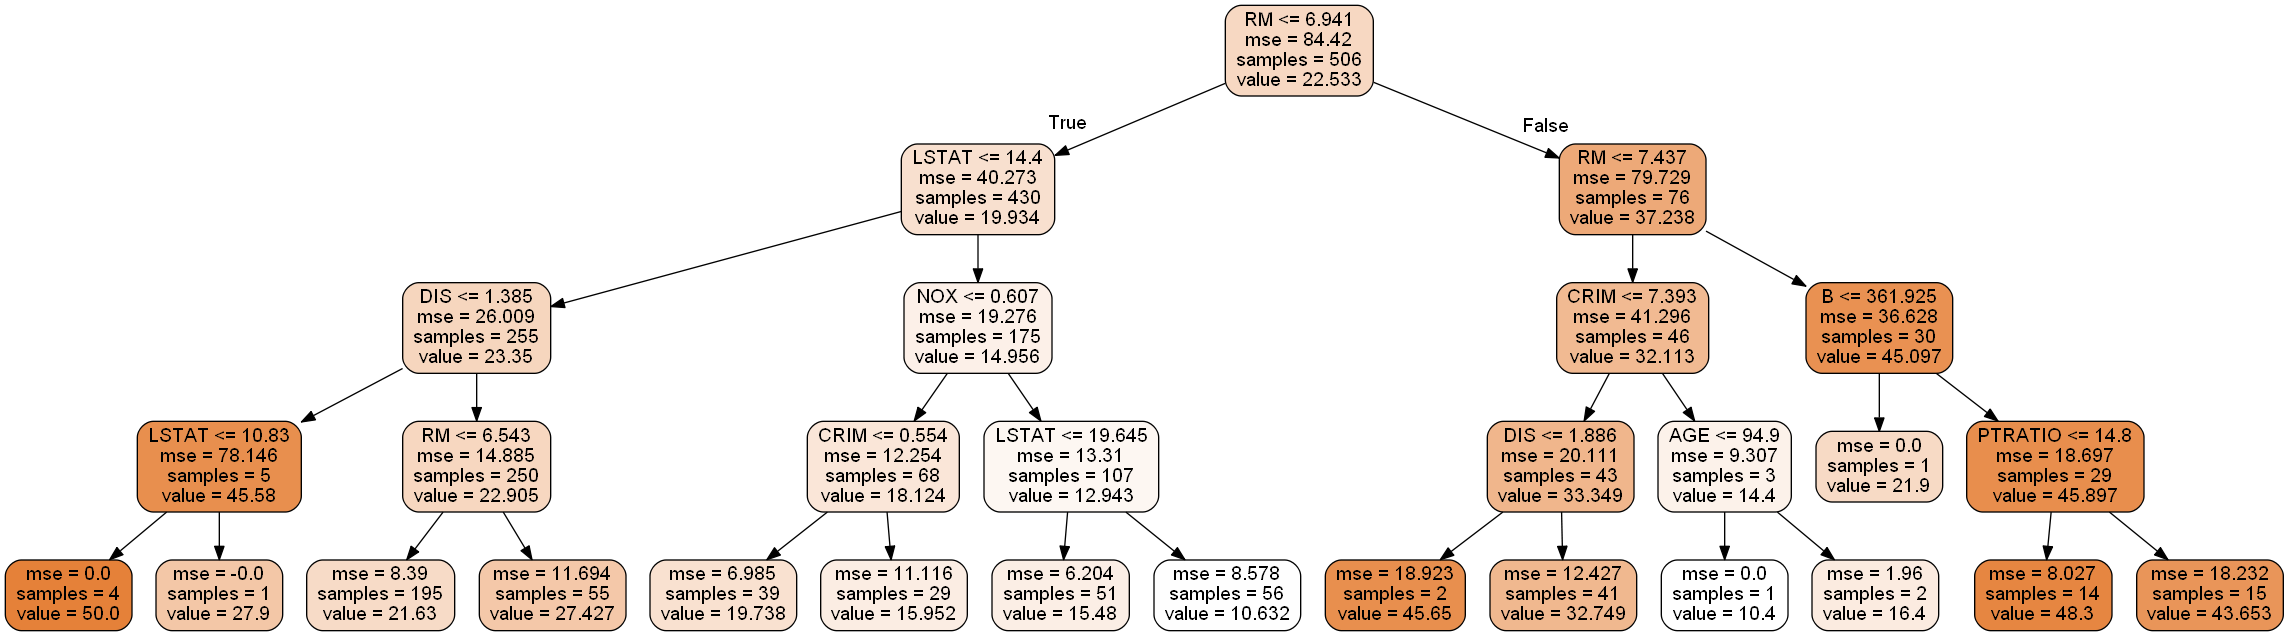

In [9]:
#可视化回归树
import pydotplus
from IPython.display import Image, display

#参数的具体含义参考：http://www.cnblogs.com/pinard/p/6056319.html
dot_data = tree.export_graphviz(rgs,
                                out_file = None,
                                feature_names = boston_feature_name,
                                class_names = boston_target,
                                filled = True,
                                rounded = True
                               )
graph = pydotplus.graph_from_dot_data(dot_data)
display(Image(graph.create_png()))




## 案例总结

案例总结：

1.通过本案例加深对回归树的理解；

2.对回归树进行可视化；


## 学习拓展

决策回归树的参数：

1.http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

2.http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor

3.http://www.th7.cn/Program/Python/201604/830424.shtml


作者：寒小阳、助教name

本文档版权归稀牛学院所有




![](http://osloyi5le.bkt.clouddn.com/%E7%A8%80%E7%89%9B%20x%20%E7%BD%91%E6%98%93.png)